<a href="https://colab.research.google.com/github/piyushdawadi/House-Price-Predictor/blob/main/HousePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()





Saving Bengaluru_House_Data.csv to Bengaluru_House_Data.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Bengaluru_House_Data.csv']))

In [ ]:
df.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df = df.drop('area_type',axis=1)
df = df.drop('availability',axis=1)
df = df.drop('society',axis=1)

In [ ]:
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [ ]:
df.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [ ]:
df["balcony"] = df["balcony"].fillna(0.0)
df["bath"]= df["bath"].fillna(0.0)

In [ ]:
df.rename(columns = {'size':'size (BHK)'}, inplace = True)

In [ ]:
df.head()

,location,size (BHK),total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [ ]:
df["size (BHK)"] = df["size (BHK)"].fillna('2 BHK')

In [ ]:
df['size (BHK)'] = df['size (BHK)'].str.split().str.get(0).astype(int)

In [ ]:
df.head()

,location,size (BHK),total_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Uttarahalli,3,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Kothanur,2,1200,2.0,1.0,51.00


In [ ]:
df['total_sqft'].unique()
#Since there are 123-254 type values we cant go ahead with these type of values so,

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
def convert(x):
  temp = x.split('-')
  if len(temp) == 2:
    return(float(temp[0])+ float(temp[1]))/2
  try:
    return float(x)
  except:
    return None                 #If NAN values then return none but dont throw error

In [ ]:
df['total_sqft'] = df['total_sqft'].apply(convert)

In [ ]:
df.head()

,location,size (BHK),total_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056.0,2.0,1.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00
2,Uttarahalli,3,1440.0,2.0,3.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00
4,Kothanur,2,1200.0,2.0,1.0,51.00


In [ ]:
df['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [ ]:
df['price_per_sqft'] = df['price']*100000/ df['total_sqft']

In [ ]:
df.isnull().sum()

location       1
size (BHK)     0
total_sqft    46
bath           0
balcony        0
price          0
dtype: int64

In [ ]:
df['total_sqft'].isnull().sum()

46

In [ ]:
df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [ ]:
df['location'] = df['location'].astype(str).apply(lambda x: x.strip())
location_count = df['location'].value_counts()

In [ ]:
location_count_less_10 = location_count[location_count<10]
location_count_less_10

Volagerekallahalli                    9
Medahalli                             9
Vishwanatha Nagenahalli               9
2nd Phase JP Nagar                    9
Chennammana Kere                      9
                                     ..
1Channasandra                         1
Hosahalli                             1
Vijayabank bank layout                1
near Ramanashree California resort    1
Abshot Layout                         1
Name: location, Length: 1041, dtype: int64

In [ ]:
df['location'] = df['location'].apply(lambda x: 'other' if x in location_count_less_10 else x)

In [ ]:
df.describe()

,size (BHK),total_sqft,bath,balcony,price
count,13320.000000,13274.000000,13320.000000,13320.000000,13320.000000
mean,2.802778,1559.626694,2.677853,1.511937,112.565627
std,1.294496,1238.405258,1.352467,0.864240,148.971674
min,1.000000,1.000000,0.000000,0.000000,8.000000
25%,2.000000,1100.000000,2.000000,1.000000,50.000000
50%,3.000000,1276.000000,2.000000,2.000000,72.000000
75%,3.000000,1680.000000,3.000000,2.000000,120.000000
max,43.000000,52272.000000,40.000000,3.000000,3600.000000


In [ ]:
df = df[((df['total_sqft'] / df['size (BHK)']) >= 300)]
df.describe()

,size (BHK),total_sqft,bath,balcony,price
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,2.650838,1594.564544,2.547885,1.522267,111.382401
std,0.976678,1261.271296,1.094606,0.852536,152.077329
min,1.000000,300.000000,0.000000,0.000000,8.440000
25%,2.000000,1116.000000,2.000000,1.000000,49.000000
50%,3.000000,1300.000000,2.000000,2.000000,70.000000
75%,3.000000,1700.000000,3.000000,2.000000,115.000000
max,16.000000,52272.000000,16.000000,3.000000,3600.000000


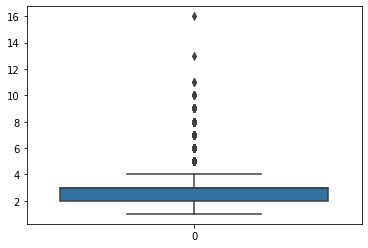

In [ ]:
sns.boxplot(data=df['size (BHK)'])


In [ ]:
df.to_csv('Housing_Project_Clean.csv')

In [ ]:
df.head()

,location,size (BHK),total_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056.0,2.0,1.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00
2,Uttarahalli,3,1440.0,2.0,3.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00
4,Kothanur,2,1200.0,2.0,1.0,51.00


In [ ]:
df['price'] = df['price']*100000
df.head()

,location,size (BHK),total_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056.0,2.0,1.0,3.907000e+16
1,Chikka Tirupathi,4,2600.0,5.0,3.0,1.200000e+17
2,Uttarahalli,3,1440.0,2.0,3.0,6.200000e+16
3,Lingadheeranahalli,3,1521.0,3.0,1.0,9.500000e+16
4,Kothanur,2,1200.0,2.0,1.0,5.100000e+16


In [ ]:
X = df.drop('price',axis= 1)
y = df['price']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [ ]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.25)

In [ ]:
column_trans = make_column_transformer((OneHotEncoder(sparse=False),['location']),remainder='passthrough')

In [ ]:
scaler = StandardScaler()

In [ ]:
lr = LinearRegression(normalize=True)

In [ ]:
pipe = make_pipeline(column_trans,scaler,lr)

In [ ]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression(normalize=True))])

In [ ]:
y_pred_lr = pipe.predict(X_test)

In [ ]:
print(y_pred_lr)

[1.93296551e+17 5.75423566e+16 9.52799170e+16 ... 4.86632344e+16
 9.46209124e+16 9.55876317e+16]


In [ ]:
r2_score(y_test,y_pred_lr)

0.4486115250856215

In [ ]:
#Here we can see the model only gives 44% accuracy this is because I did not remove the outliers properly.

In [ ]:
from joblib import dump,load

In [ ]:
dump(pipe,'Housing_Predictor_Model.joblib')

['Housing_Predictor_Model.joblib']

In [ ]:
loaded_model = load('Housing_Predictor_Model.joblib')